# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [293]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [294]:
def obs(data):
    print('='*50)
    print('Shape of dataset')
    print('='*50)
    print(data.shape)
    print('='*50)
    print('Data information')
    print('='*50)
    print(data.info())
    print('='*50)
    print('# of Duplicate values')
    print('='*50)
    print(data.duplicated().sum())

In [295]:
visa = pd.read_csv('EasyVisa.csv')
df = visa.copy()


In [296]:
obs(df)

Shape of dataset
(25480, 12)
Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None
# of Duplicate values
0


In [297]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [298]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [299]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


    
def labeled_barplot(data, feature, perc=False, n=None, title=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

        ax.set_title(title)

    plt.show()  # show the plot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    ##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Univariate Analysis

In [300]:
df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [301]:
cat_col = df.select_dtypes('object').columns.to_list()

for column in cat_col:
    print(df[column].value_counts())
    print('-' * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

### case_id

In [302]:
df['case_id'].nunique()

25480

In [303]:
df.drop(['case_id'], axis=1, inplace=True)

### continent

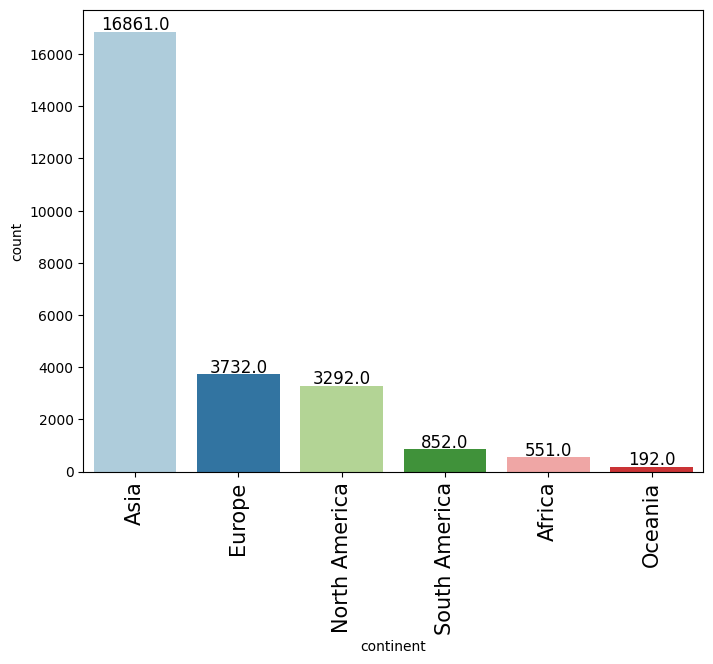

In [304]:
labeled_barplot(df, 'continent')

### education_of_employee


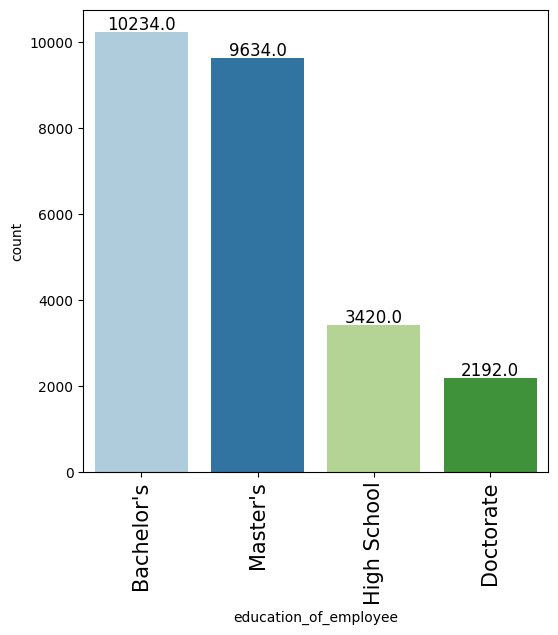

In [305]:
labeled_barplot(df, 'education_of_employee')

### has_job_experience


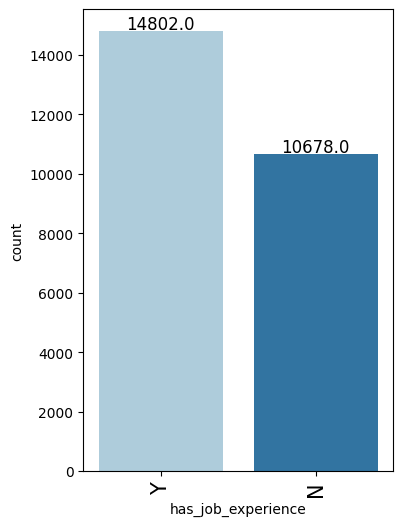

In [306]:
labeled_barplot(df, 'has_job_experience')

### requires_job_training

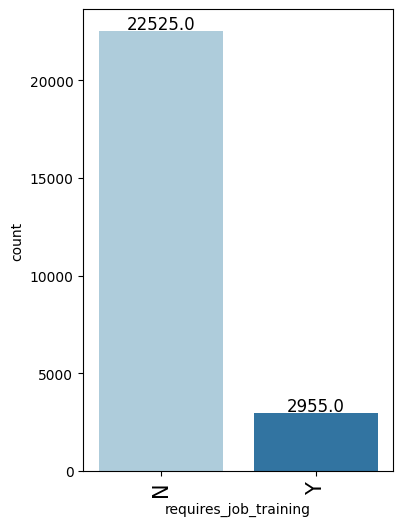

In [307]:
labeled_barplot(df, 'requires_job_training')

### no_of_employees

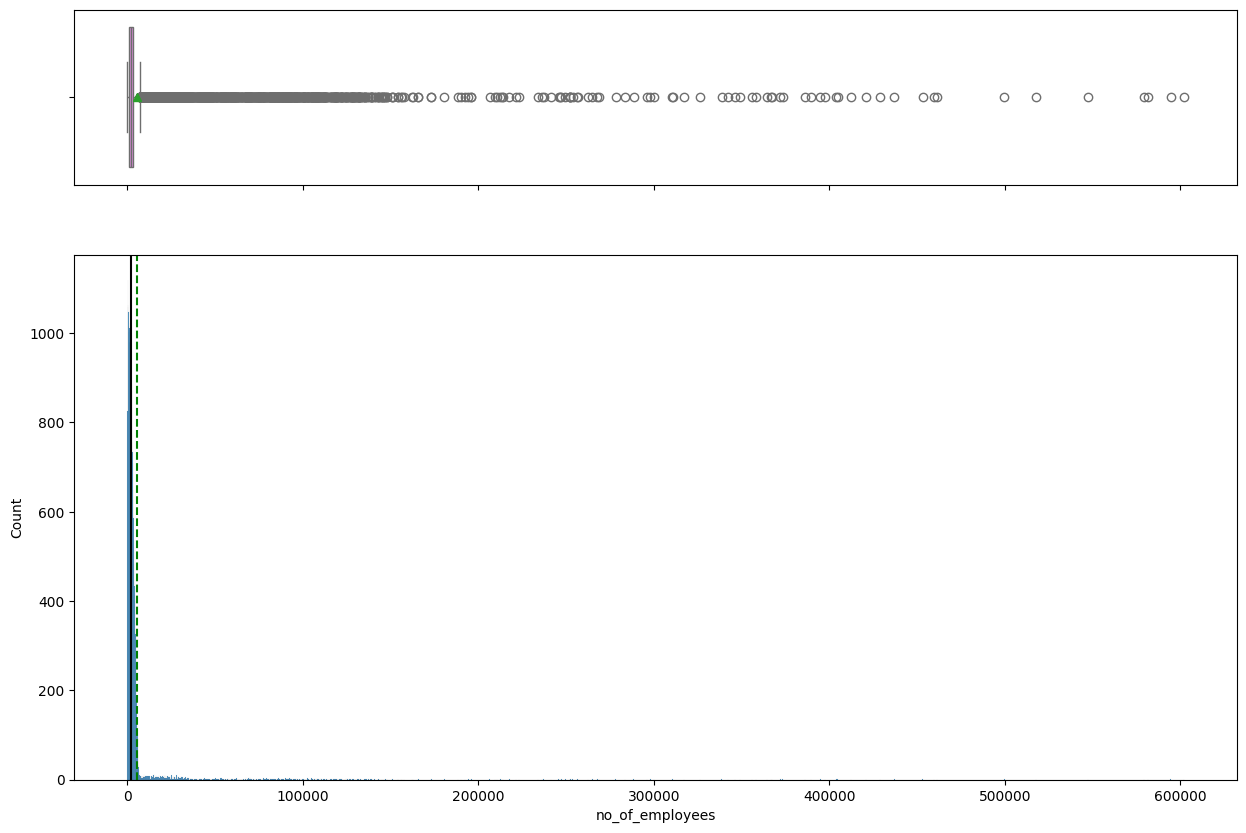

In [308]:
histogram_boxplot(df, 'no_of_employees')

In [309]:
df['no_of_employees'].describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [310]:
df.loc[df['no_of_employees'] < 0].shape

(33, 11)

In [311]:
df['no_of_employees'] = abs(df['no_of_employees'])

### yr_of_estab

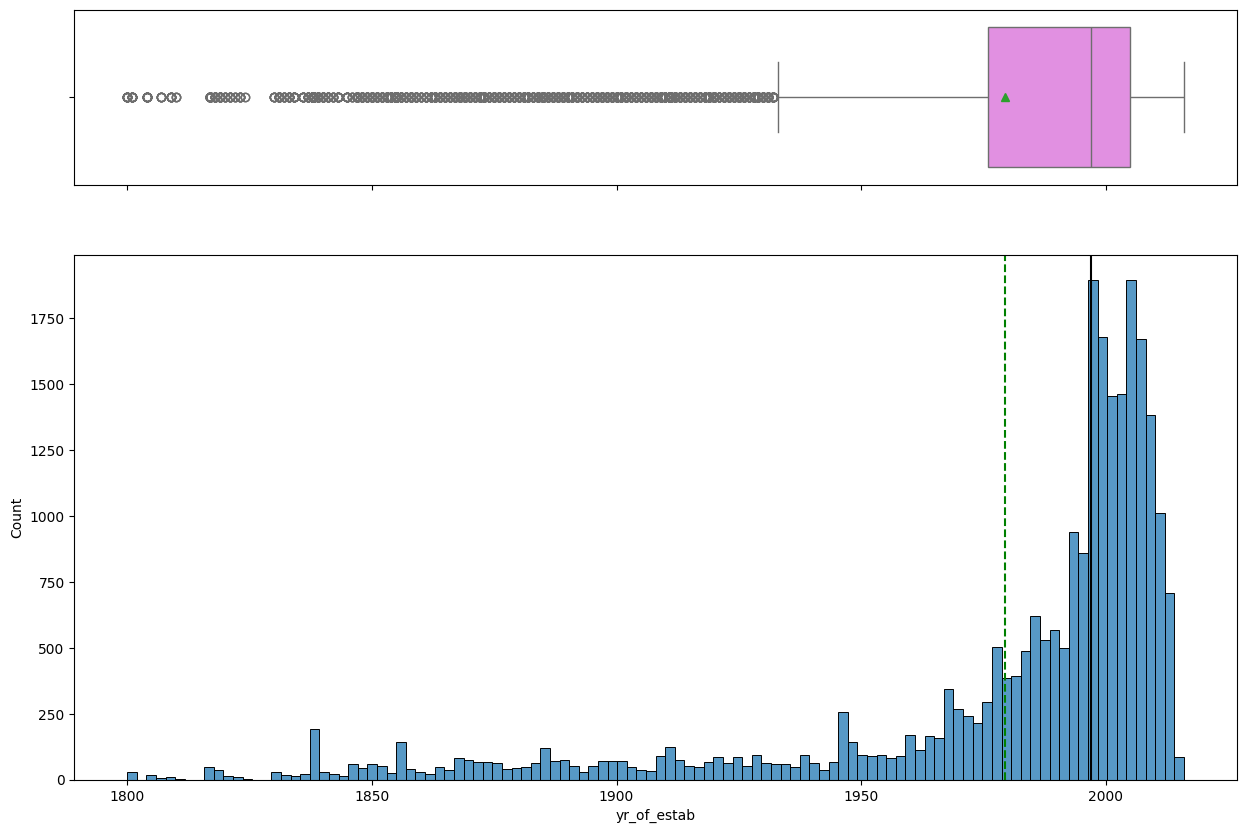

In [312]:
histogram_boxplot(df, 'yr_of_estab')

### region_of_employment
 

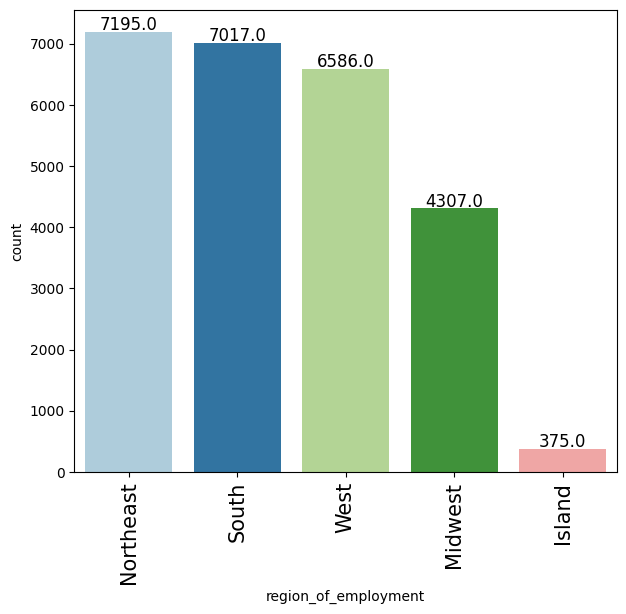

In [313]:
labeled_barplot(df, 'region_of_employment')

### prevailing_wage

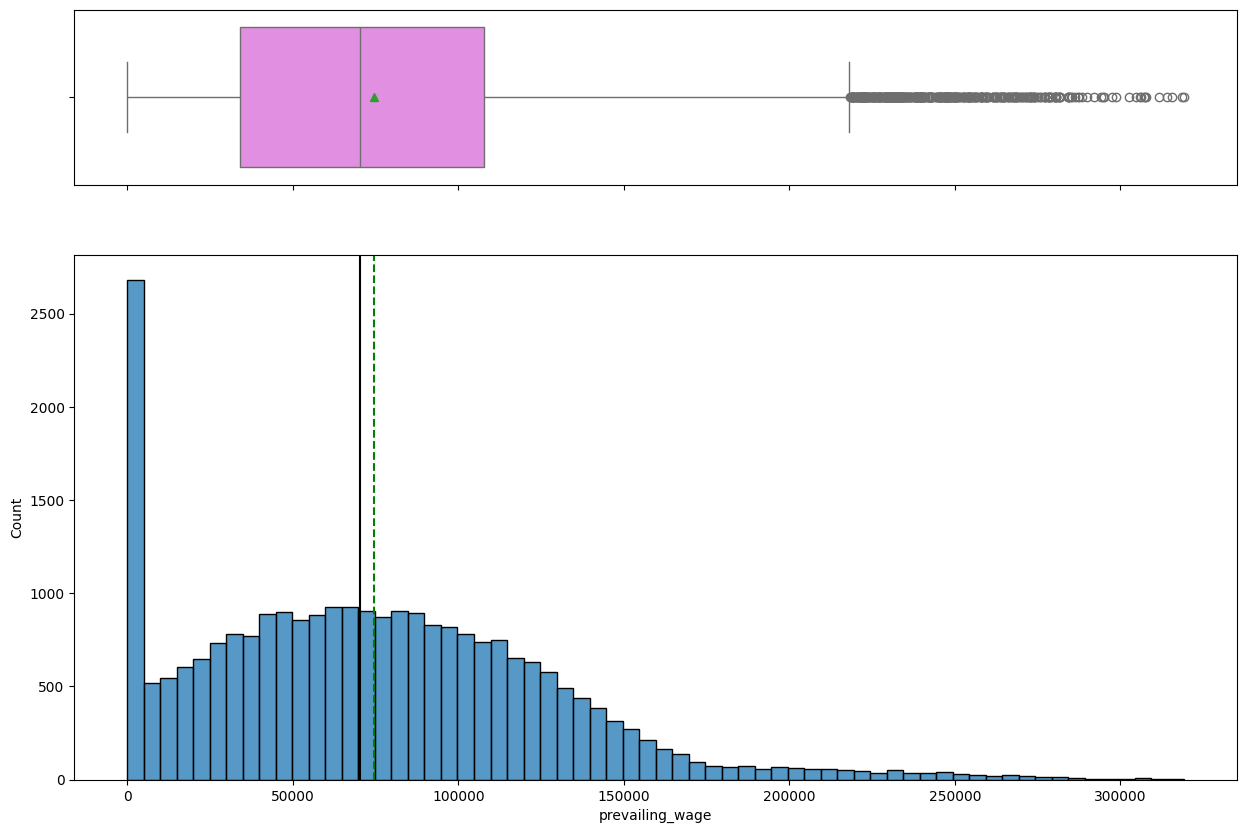

In [314]:
histogram_boxplot(df, 'prevailing_wage')

In [315]:
df.loc[df['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [316]:
df.loc[df['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

### unit_of_wage

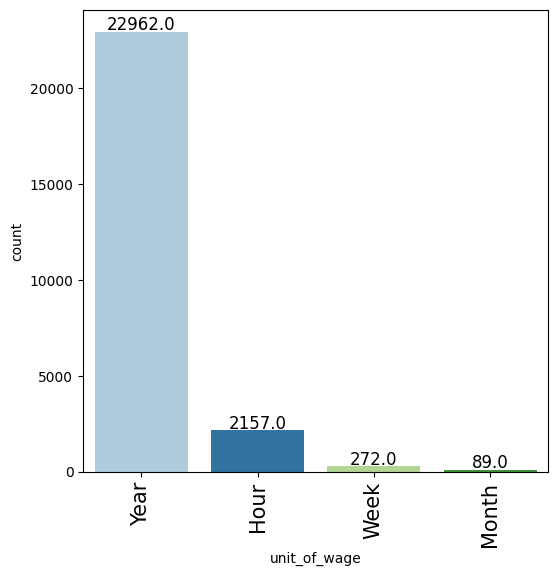

In [317]:
labeled_barplot(df, 'unit_of_wage')

### full_time_position

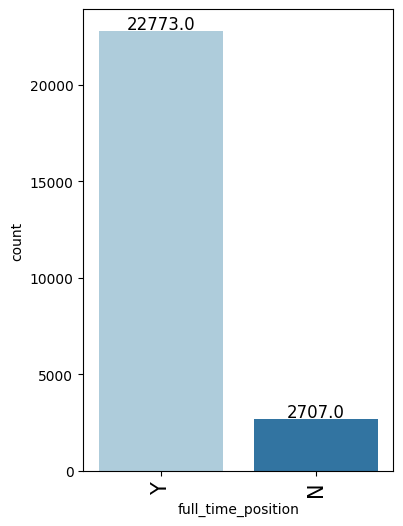

In [318]:
labeled_barplot(df, 'full_time_position')

### case_status

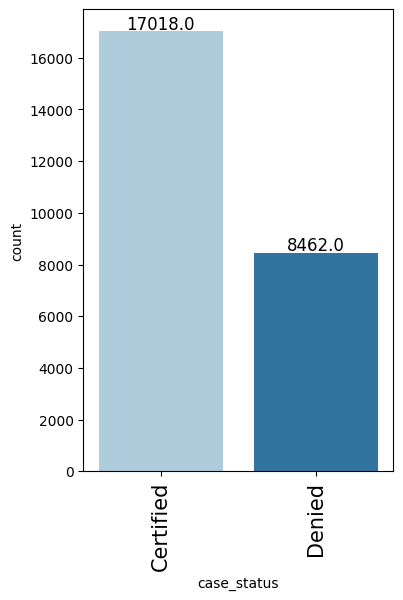

In [319]:
labeled_barplot(df,'case_status')

## Bivariate Analysis

### Certified vs Higer Ed.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


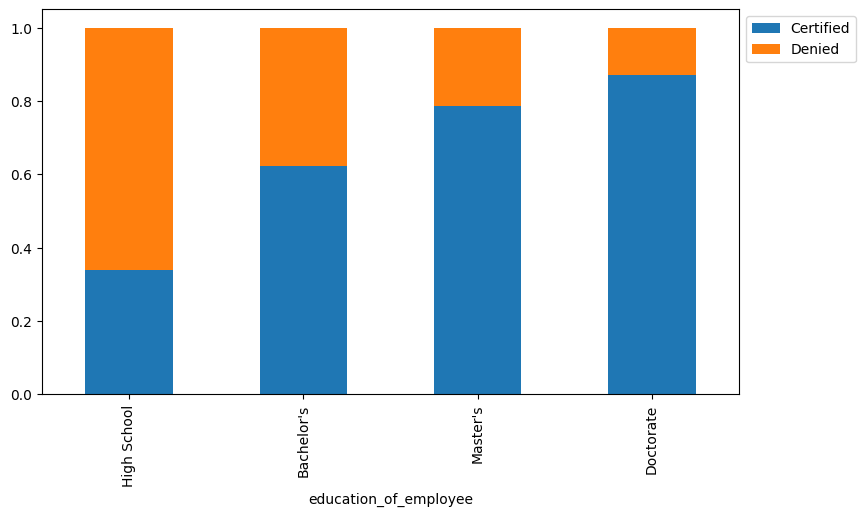

In [320]:
stacked_barplot(df,'education_of_employee', 'case_status')

### Certified vs Region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


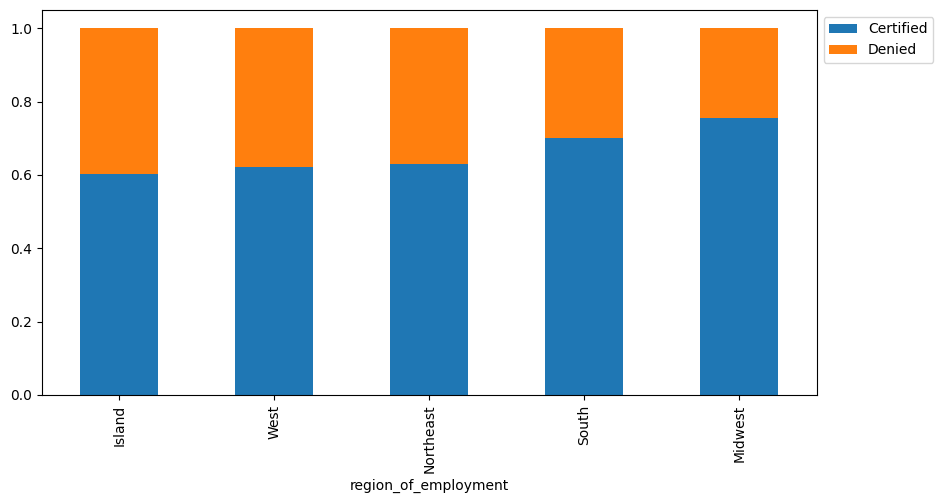

In [321]:
stacked_barplot(df,'region_of_employment', 'case_status')

### Education of employee vs Region of employment

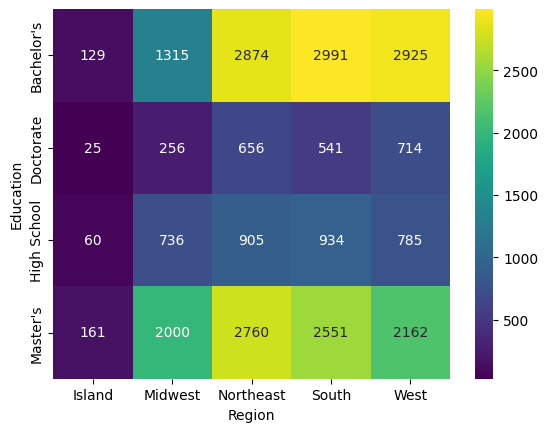

In [322]:
# pd.crosstab(df['region_of_employment'], df['education_of_employee'])
sns.heatmap(pd.crosstab(df['education_of_employee'], df['region_of_employment']),
            annot=True,
            fmt='g',
            cmap='viridis')

plt.ylabel('Education')
plt.xlabel('Region')
plt.show()

### Certified vs Full time position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


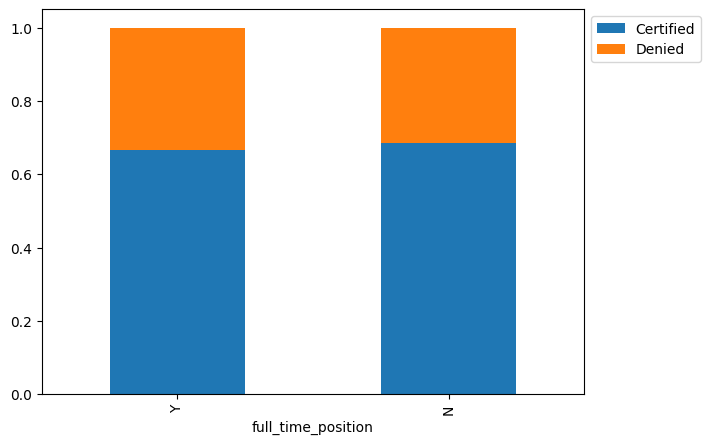

In [323]:
stacked_barplot(df,'full_time_position', 'case_status')

### Certified vs Continents 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


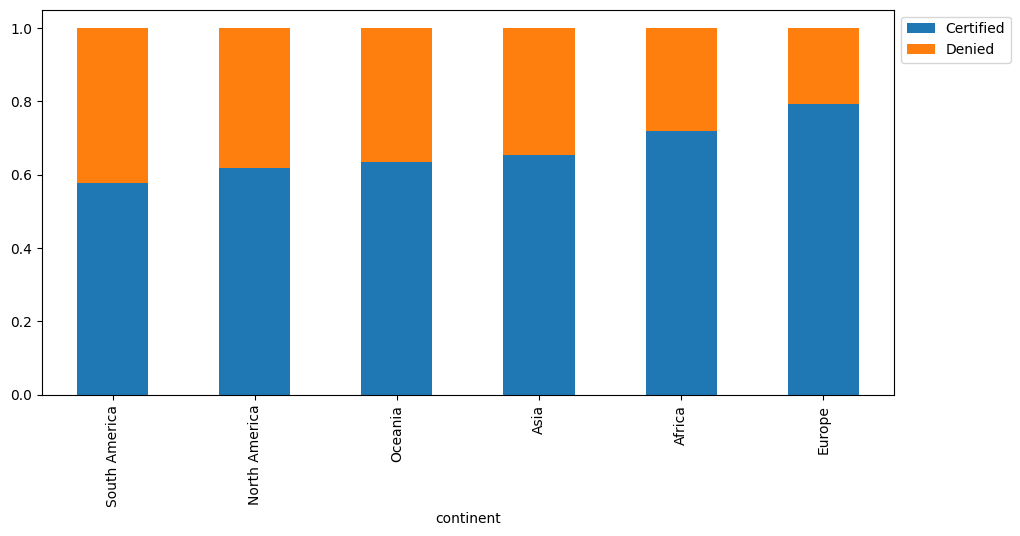

In [324]:
stacked_barplot(df, 'continent', 'case_status')

### Certified vs has_job_experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


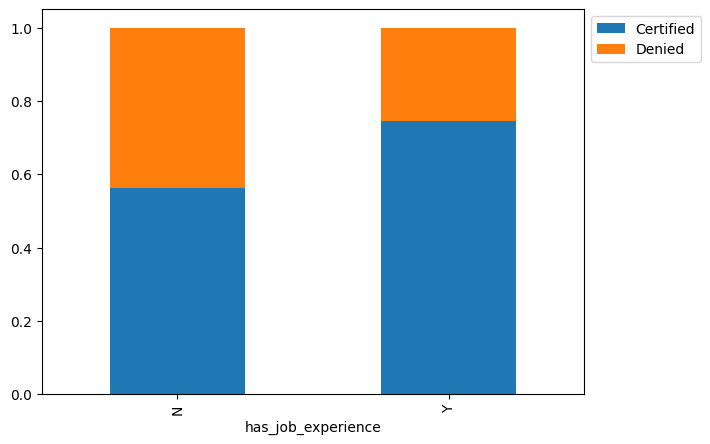

In [325]:
stacked_barplot(df, 'has_job_experience', 'case_status')

### has_job_experience vs requires_job_training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


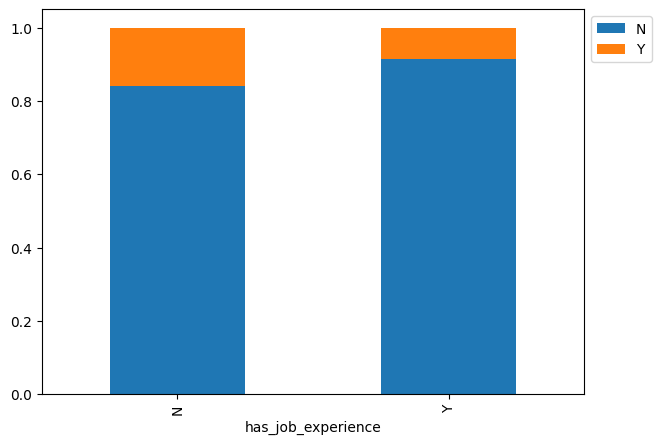

In [326]:
stacked_barplot(df, 'has_job_experience', 'requires_job_training')

### Certified vs prevailing wage

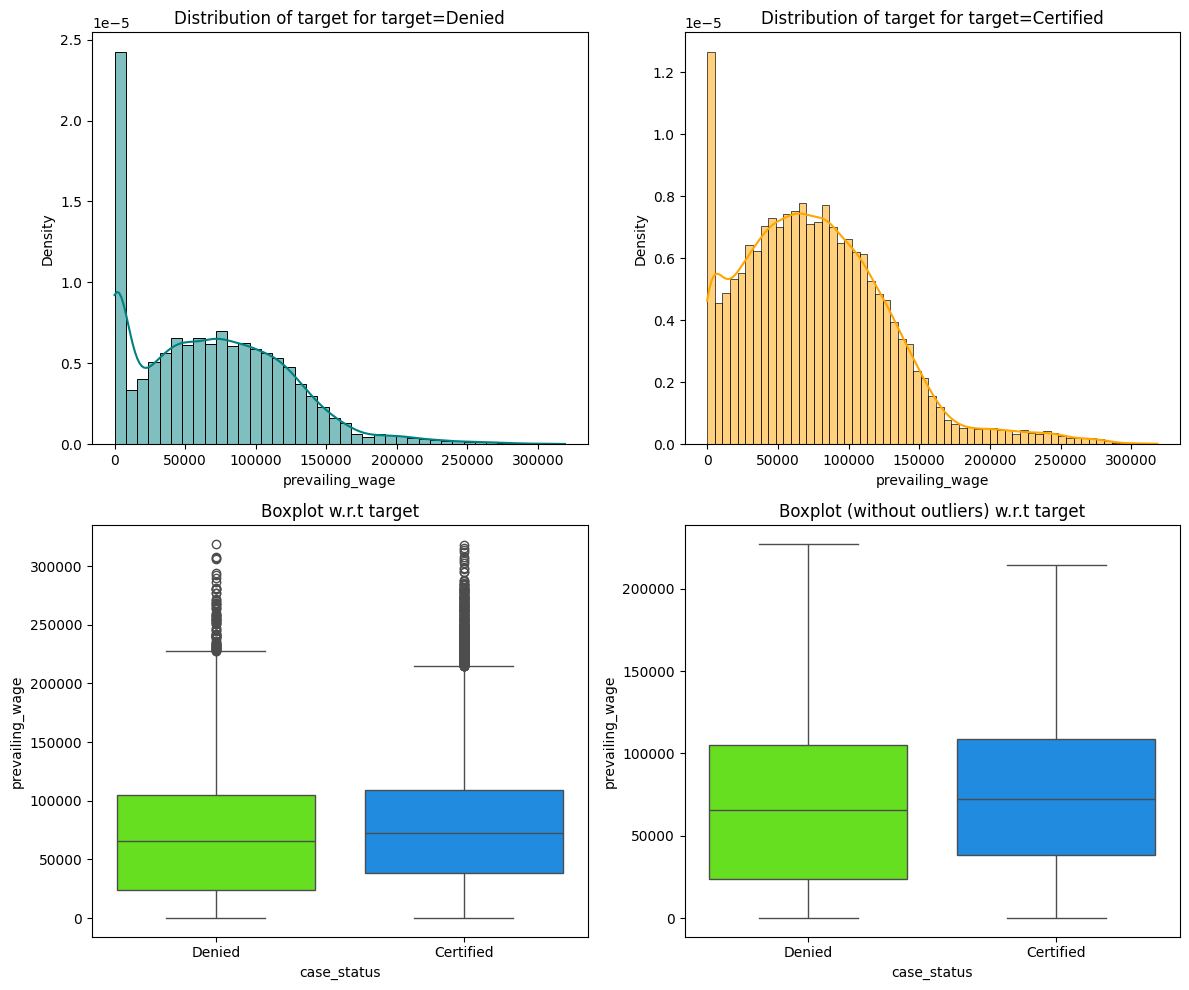

In [327]:
distribution_plot_wrt_target(df,'prevailing_wage', 'case_status')

### prevailing wage vs region of employment

<Axes: xlabel='region_of_employment', ylabel='prevailing_wage'>

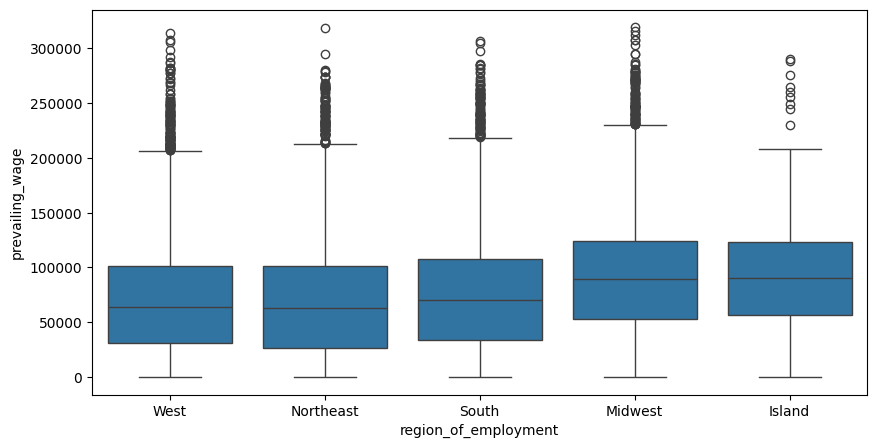

In [328]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='region_of_employment', y='prevailing_wage')

### Certified vs unit_of_wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


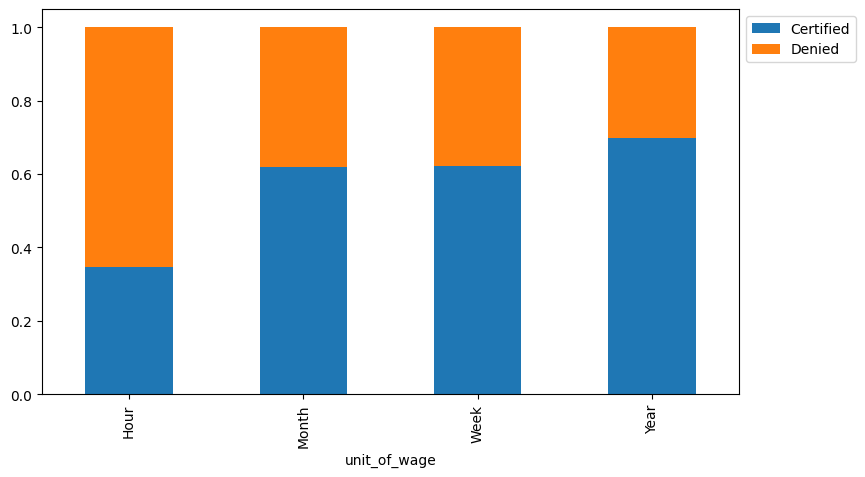

In [329]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

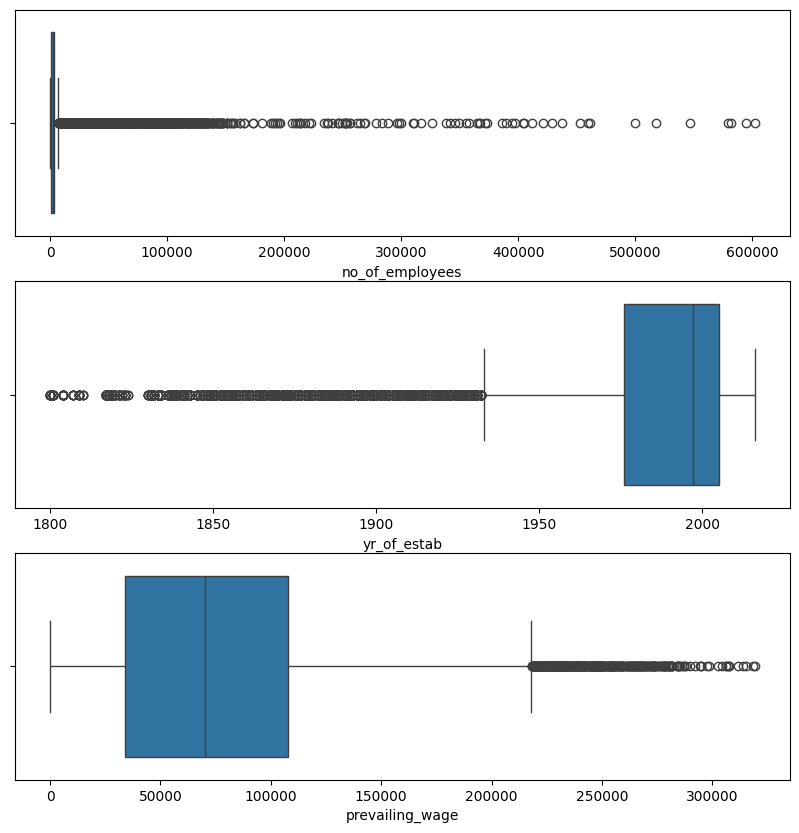

In [330]:
num_col = df.select_dtypes(include=np.number).columns.to_list()

fig, axe = plt.subplots(3,1, figsize=(10,10))

for i, var in enumerate(num_col):
    sns.boxplot(df, x=var, ax=axe[i])

plt.show()

### Data prep for modeling

* We want to predict which visas will be certified
* We want o encode categorical features
* We will split the data into train and test sets to evaluate the model on train data.

In [331]:
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

Y = df['case_status']
X = df.drop(['case_status'], axis=1)

X = pd.get_dummies(X, dtype=float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [332]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of test set :  (7644, 28)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model Evaluation

### Model can make wrong predictions like:

1. Model predicts the visa applicaiton will be certified but the visa application should be denied.
2. Model predicts the visa application will not be certified but the visa application should not be denied.

### Which case is more important:

1. If the visa is apporved when it should be denied; a US person will miss the opportunity to be emplyoed in that position.
2. If the visa is denied when it should be approved; the job may remain unoccupied reducing productivity in the US economy


* `Fi Score` can be used to evaluate the model. The greater the F1 score the higher the chances of minimizing False Negatives and False Positives. 
* We will used balanced class weights so that the model focuses equially on both classes.

## Building bagging and boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [333]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [334]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision Tree

In [335]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66}, random_state=1)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.66}, random_state=1)

#### Training matrix and performance

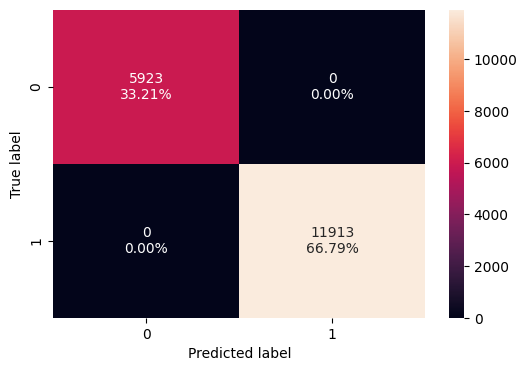

In [336]:
confusion_matrix_sklearn(dtree, X_train, Y_train)

In [337]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_train, Y_train)
print('Training performance \n', dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Testing matrix and performance

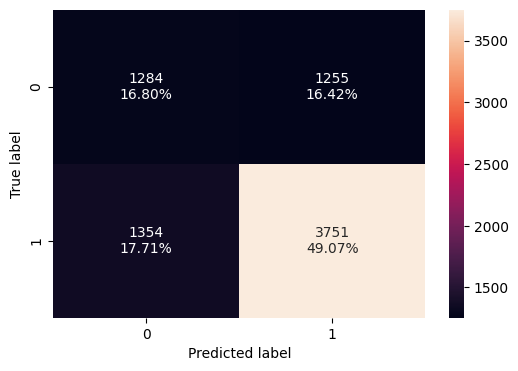

In [338]:
confusion_matrix_sklearn(dtree, X_test, Y_test)

In [339]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, Y_test)
print('Testing performance \n', dtree_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.658687  0.73477   0.749301  0.741964


* Decision tree is overfiting on the training data. The accuracy on the testing data is low. 

### Bagging

In [340]:
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66}))
bagging_classifier.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.66}))

#### Training matrix and performance

In [341]:
bagging_classifier_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, Y_train)
print('Training performance \n', bagging_classifier_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984301  0.985226   0.991217  0.988213


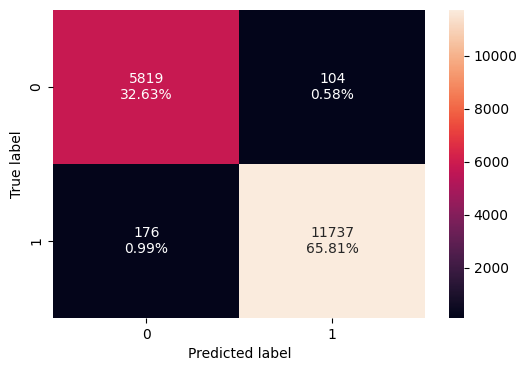

In [342]:
confusion_matrix_sklearn(bagging_classifier, X_train, Y_train)

#### Testing matrix and performance

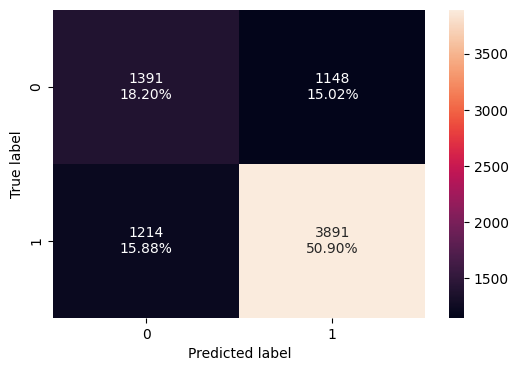

In [343]:
confusion_matrix_sklearn(bagging_classifier, X_test, Y_test)

In [344]:
bagging_classifier_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, Y_test)
print('Testing performance \n', bagging_classifier_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.690999  0.762194   0.772177  0.767153


* Bagging classifier is overfitting on the training data and performing poor in terms of accuracy in testing data.

### Random Forest

In [345]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Training matrix and performance

In [346]:
rf_estimator_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, Y_train)
print('Training performance \n', rf_estimator_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


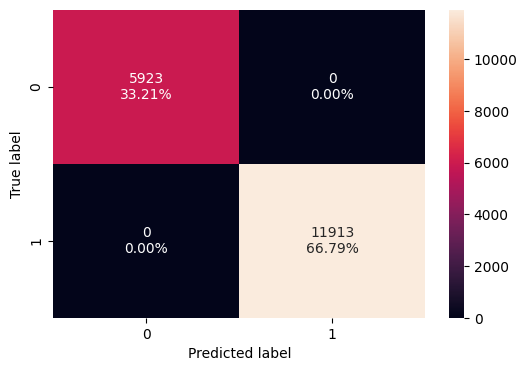

In [347]:
confusion_matrix_sklearn(rf_estimator,X_train, Y_train)

#### Testing matrix and performance

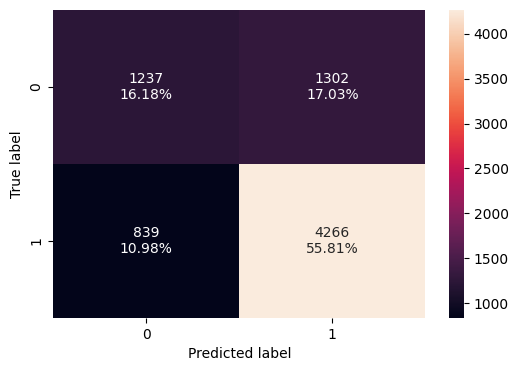

In [348]:
confusion_matrix_sklearn(rf_estimator, X_test, Y_test)

In [349]:
rf_estimator_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, Y_test)
print('Testing performance \n', rf_estimator_test_perf)

Testing performance 
    Accuracy    Recall  Precision      F1
0  0.719911  0.835651   0.766164  0.7994


* Random Forest is performing well in recall but is not able to generalize well in other categories

### Adaboosting

In [350]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, Y_train)

AdaBoostClassifier(random_state=1)

#### Training matrix and performance

In [351]:
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, Y_train)
print('Training performance \n', abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738058  0.886259   0.760937  0.81883


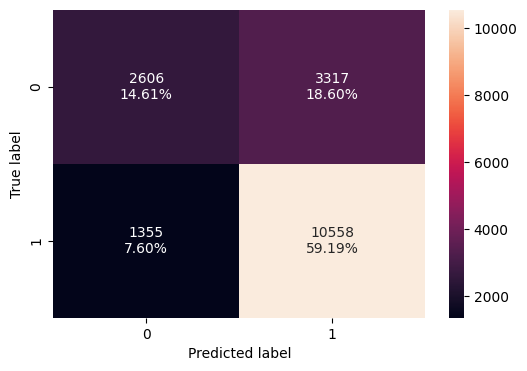

In [352]:
confusion_matrix_sklearn(abc, X_train, Y_train)

#### Testing matrix and performance

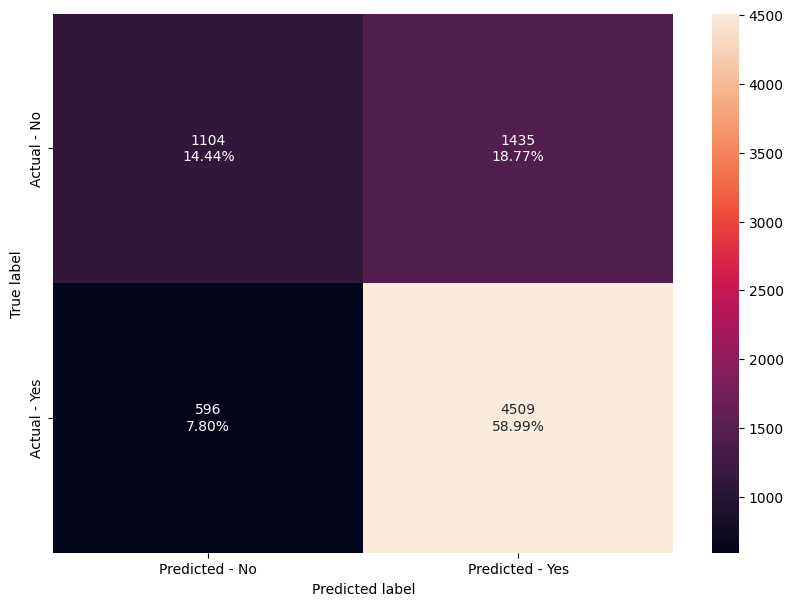

In [353]:
make_confusion_matrix(abc, Y_test)

In [354]:
abc_model_test_perf = model_performance_classification_sklearn(abc, X_test, Y_test)
print('Testing performance \n', abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.883252    0.75858  0.816182


* Adaboost is performing well in F1 and Recall but preforming poorly on the test data in terms of Precision and Accuracy. 

### Gradient boosting

In [355]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

#### Training matrix and performance

In [356]:
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, Y_train)
print('Training performance \n', gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.757849  0.883657   0.782095  0.82978


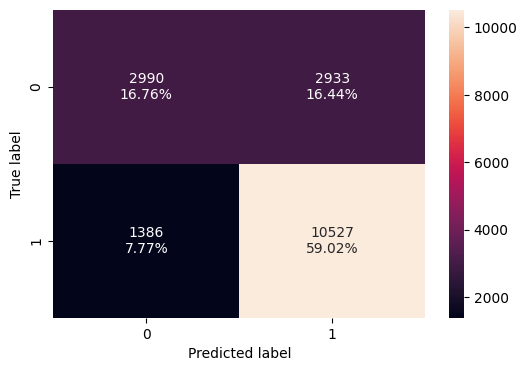

In [357]:
confusion_matrix_sklearn(gbc, X_train, Y_train)

#### Testing matrix and performance

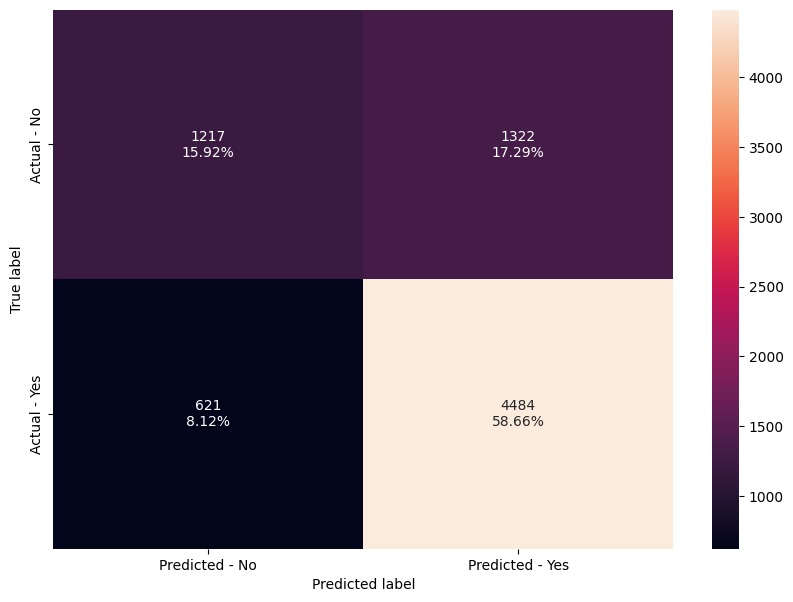

In [358]:
make_confusion_matrix(gbc, Y_test)

In [359]:
gbc_model_test_perf = model_performance_classification_sklearn(gbc, X_test, Y_test)
print('Testing performance \n', gbc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745814  0.878355   0.772305  0.821923


* Gradient boost is performing well in terms of Recall and F1 score in both the train data and test data.

### XGboost Classifer

In [360]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Training matrix and performance

In [361]:
xgb_model_train_perf = model_performance_classification_sklearn(xgb, X_train, Y_train)
print('Training performance \n', xgb_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.840884  0.930664     0.8464  0.886534


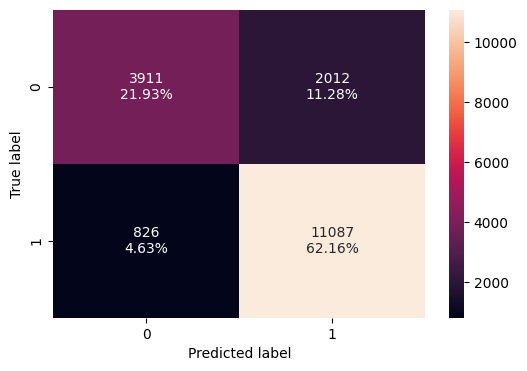

In [362]:
confusion_matrix_sklearn(xgb, X_train, Y_train)

#### Testing matrix and performance

In [363]:
xgb_model_test_perf = model_performance_classification_sklearn(xgb, X_test, Y_test)
print('Testing performance \n', xgb_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.726583  0.850735   0.765826  0.80605


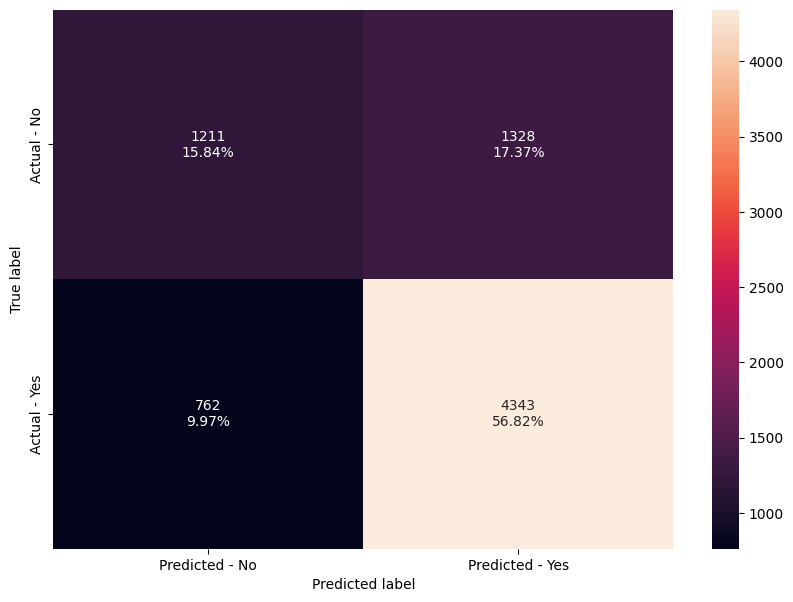

In [364]:
make_confusion_matrix(xgb, Y_test)

##  Will tuning the hyperparameters improve the model performance?

### Decision Tree tuning

In [365]:
dtree_tuned = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66}, random_state=1)

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.66}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

#### Training matrix and performance

In [366]:
dtree_model_tuned_train_perf = model_performance_classification_sklearn(dtree_tuned, X_train, Y_train)
print('Training performance \n', dtree_model_tuned_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.724434  0.94485   0.725538  0.820797


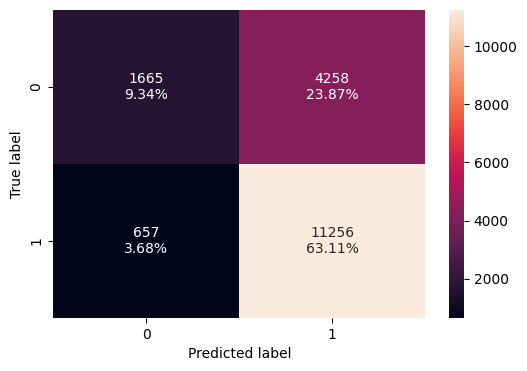

In [367]:
confusion_matrix_sklearn(dtree_tuned, X_train, Y_train)

#### Testing matrix and performance

In [368]:
dtree_model_tuned_test_perf = model_performance_classification_sklearn(dtree_tuned, X_test, Y_test)
print('Testing performance \n', dtree_model_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.714024  0.941626   0.717999  0.814746


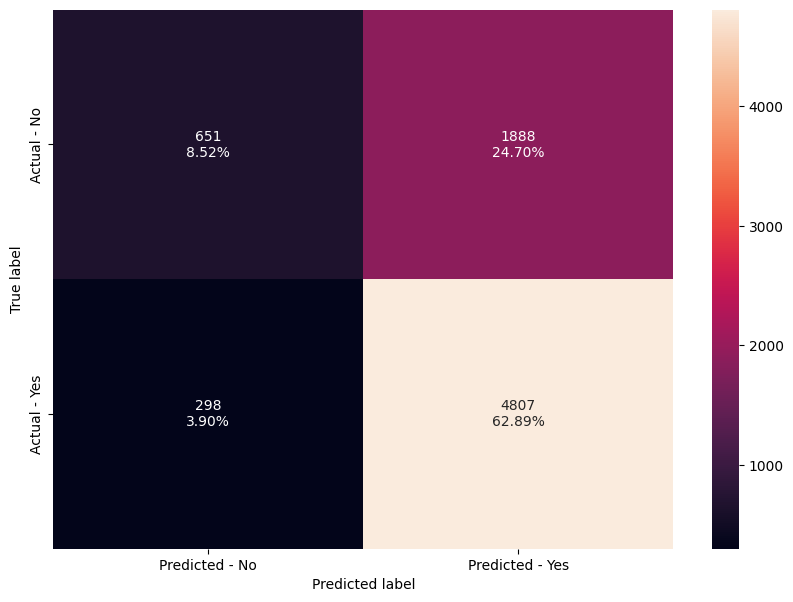

In [369]:
make_confusion_matrix(dtree_tuned, Y_test)

#### Feature importance

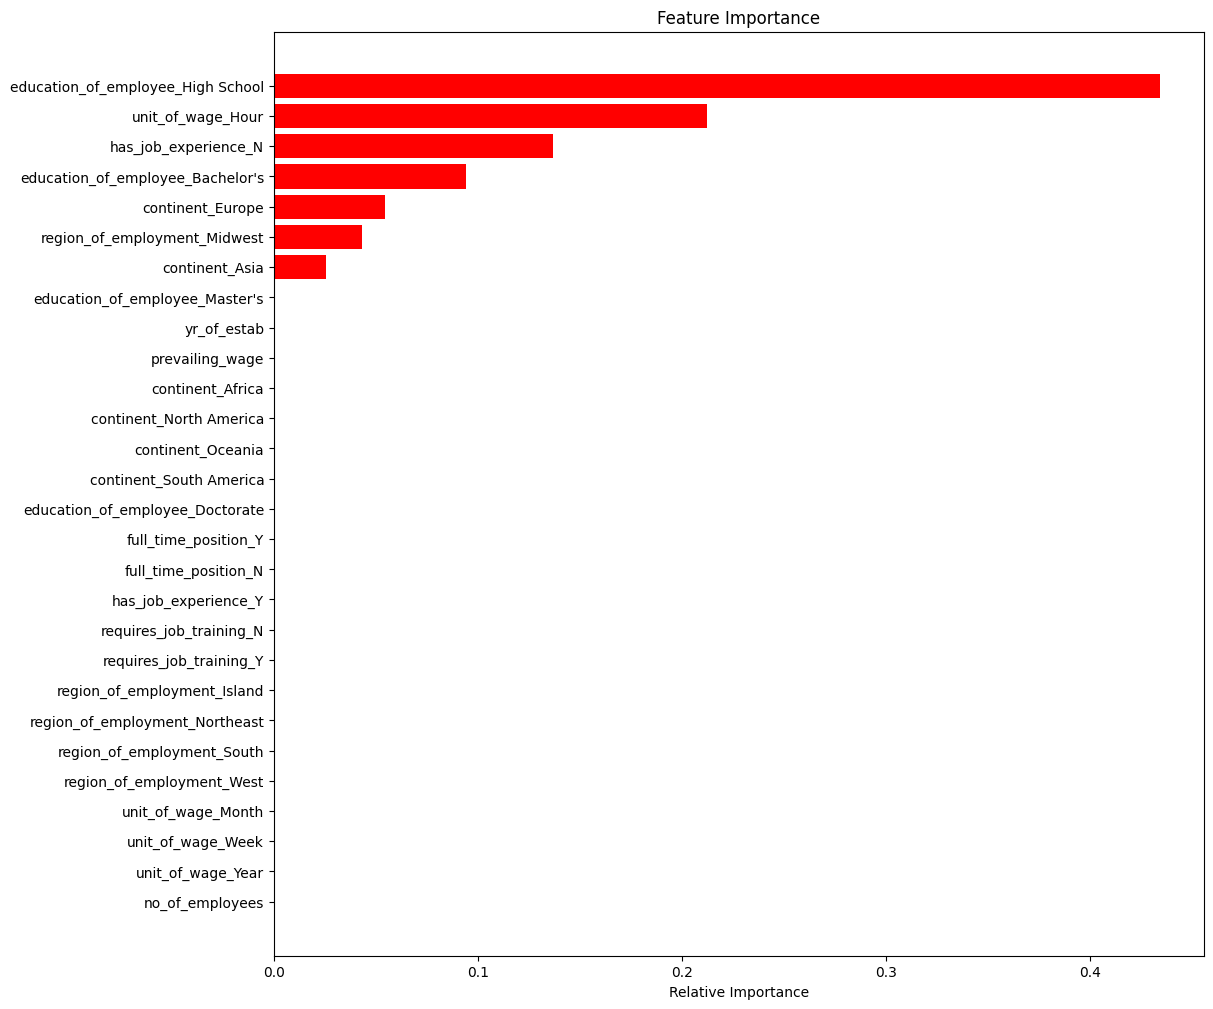

In [370]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Bagging tuning

In [371]:
bagging_classifier_tuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.66}))

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_classifier_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

bagging_classifier_tuned = grid_obj.best_estimator_

bagging_classifier_tuned.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.66}),
                  max_features=0.7, max_samples=0.9, n_estimators=70)

#### Training matrix and performance

In [372]:
bagging_classifier_tuned_train_perf = model_performance_classification_sklearn(bagging_classifier_tuned, X_train, Y_train)
print('Training performance \n', bagging_classifier_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.998374  0.999916   0.997655  0.998784


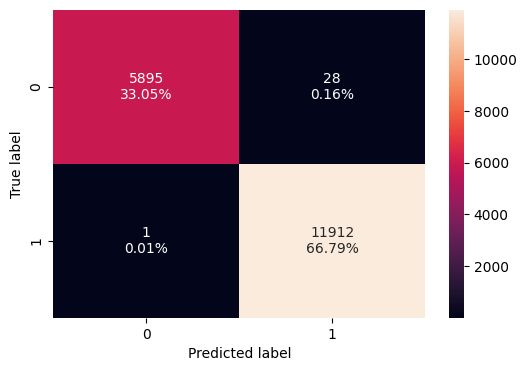

In [373]:
confusion_matrix_sklearn(bagging_classifier_tuned, X_train, Y_train)

#### Testing matrix and performance

In [374]:
bagging_classifier_tuned_test_perf = model_performance_classification_sklearn(bagging_classifier_tuned, X_test, Y_test)
print('Training performance \n', bagging_classifier_tuned_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.731816  0.867189   0.763407  0.811996


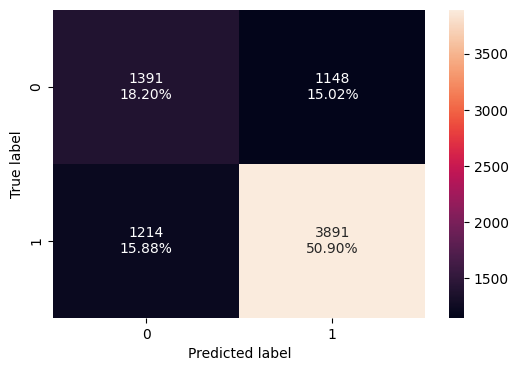

In [375]:
confusion_matrix_sklearn(bagging_classifier, X_test, Y_test)

### Random Forest turning

In [376]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       oob_score=True, random_state=1)

#### Training matrix and performance

In [377]:
rf_tuned_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, Y_train)
print('Training performance \n', rf_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.789303  0.901956   0.805774  0.851157


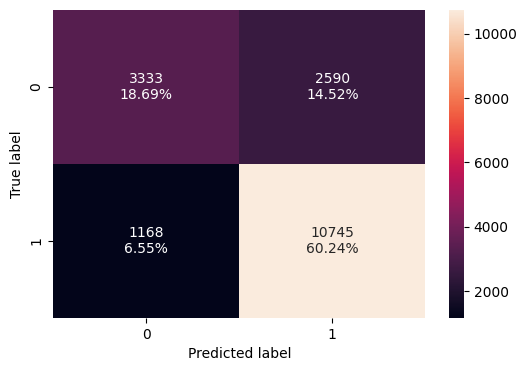

In [378]:
confusion_matrix_sklearn(rf_tuned, X_train, Y_train)

#### Testing matrix and performance

In [379]:
rf_tuned_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, Y_test)
print('Testing performance \n', rf_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743328  0.871499   0.773067  0.819337


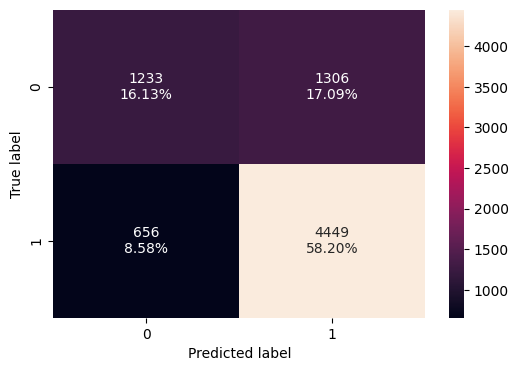

In [380]:
confusion_matrix_sklearn(rf_tuned, X_test, Y_test)

#### Feature importance 

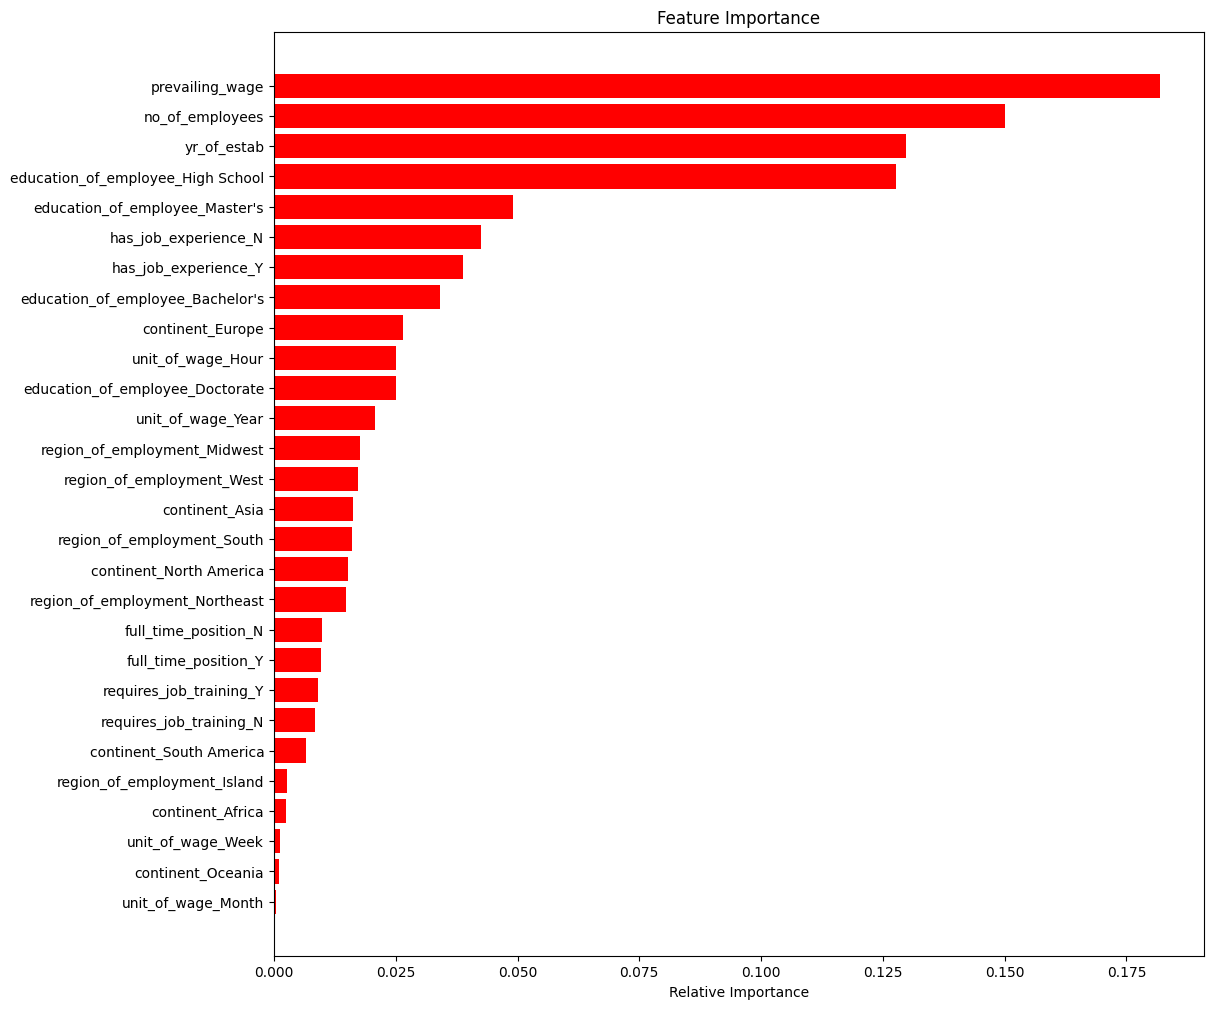

In [381]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### AdaBoost tuning

In [382]:
abc_tuned = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, Y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

#### Training matrix and performance

In [383]:
abc_tuned_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, Y_train)
print('Training performance \n', abc_tuned_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.753869  0.88735   0.776195  0.828059


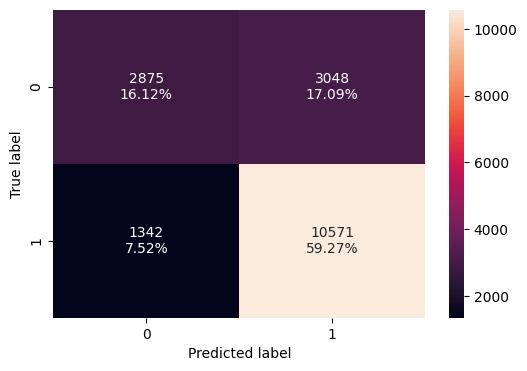

In [384]:
confusion_matrix_sklearn(abc_tuned , X_train, Y_train)

#### Testing matrix and performance

In [385]:
abc_tuned_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, Y_test)
print('Testing performance \n', abc_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743851  0.881881   0.768653  0.821383


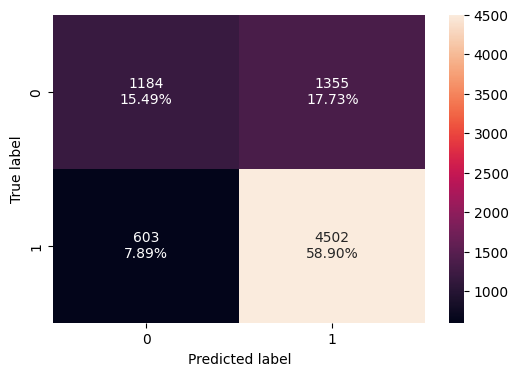

In [386]:
confusion_matrix_sklearn(abc_tuned , X_test, Y_test)

#### Feature importance

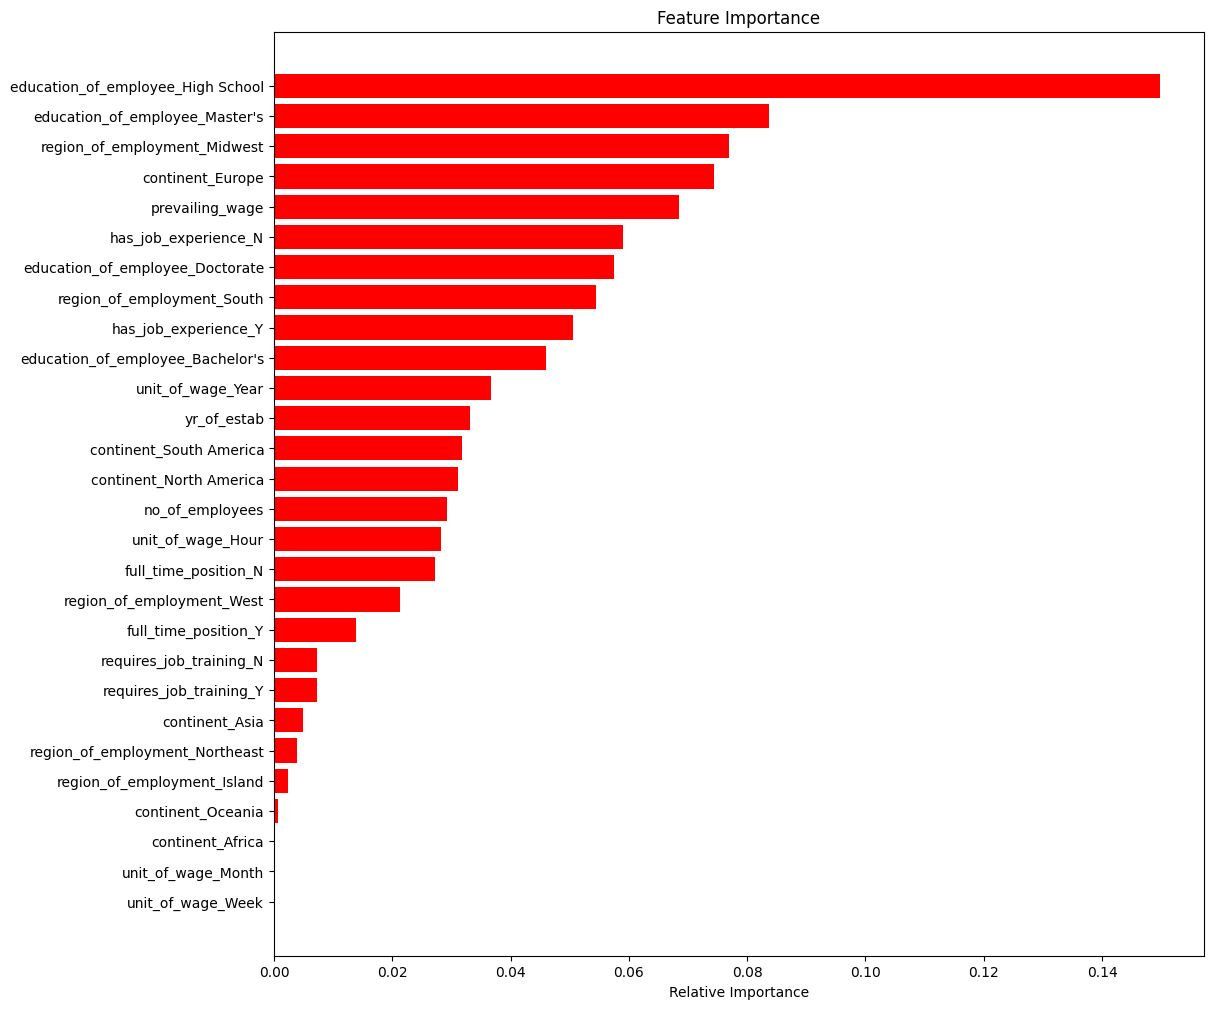

In [387]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boost tuning

In [388]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
## add from article
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.9)

#### Training matrix and performance

In [389]:
gbc_tuned_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, Y_train)
print('Training performance \n', gbc_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.753756  0.885671   0.776894  0.827724


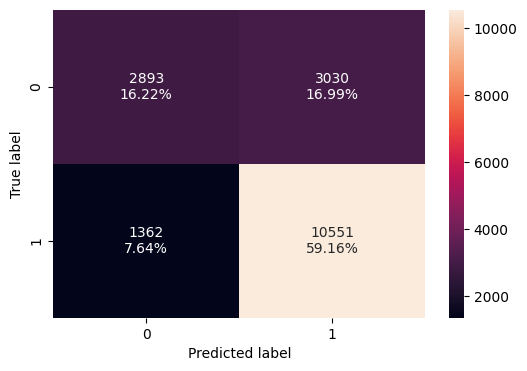

In [390]:
confusion_matrix_sklearn(gbc_tuned, X_train, Y_train)

#### Testing matrix and performance

In [391]:
gbc_tuned_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, Y_test)
print('Testing performance \n', gbc_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745029  0.881489   0.770021  0.821993


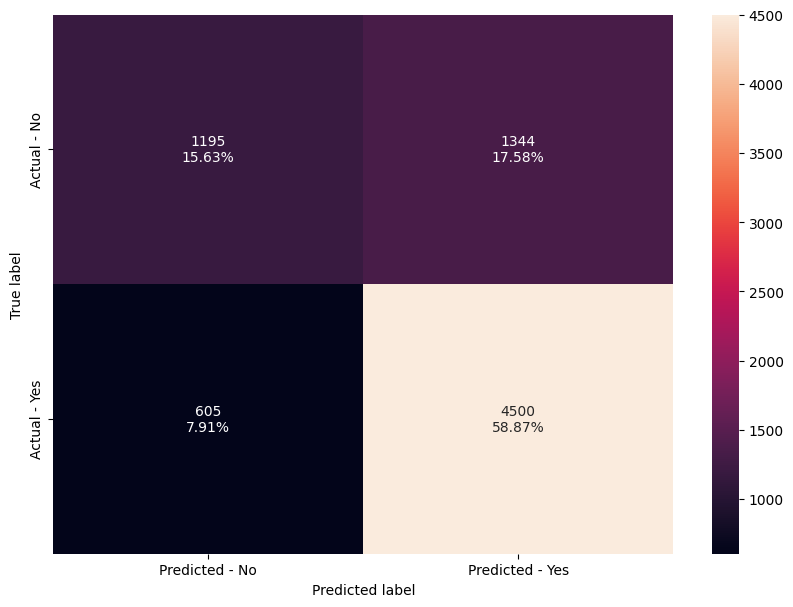

In [392]:
make_confusion_matrix(gbc_tuned,Y_test)

#### Feature importance

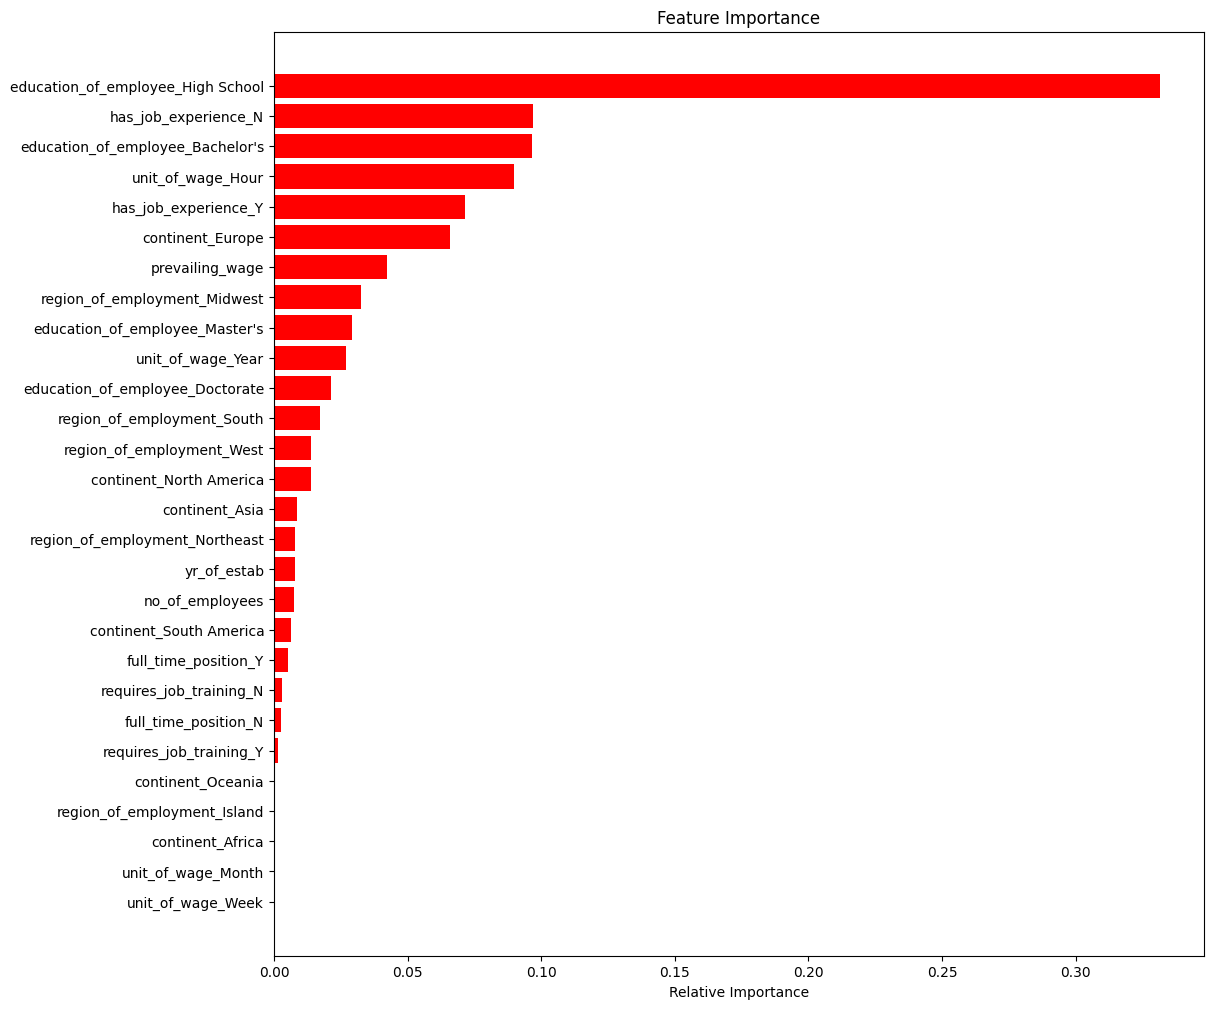

In [393]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost tuning

In [394]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, param_grid,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Training matrix and performance

In [395]:
xgb_tuned_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, Y_train)
print('Training performance \n', xgb_tuned_train_perf)

Training performance 
    Accuracy   Recall  Precision       F1
0  0.759475  0.89247   0.779415  0.83212


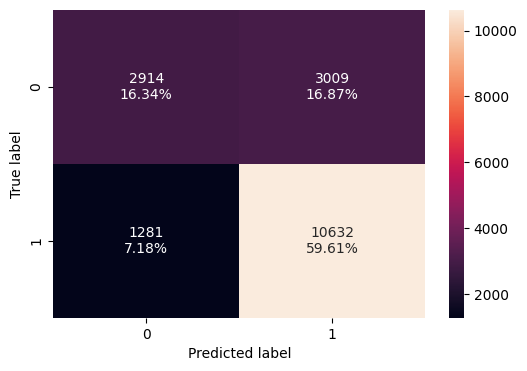

In [396]:
confusion_matrix_sklearn(xgb_tuned, X_train, Y_train)

#### Testing matrix and performance

In [397]:
xgb_tuned_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, Y_test)
print('Testing performance \n', xgb_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743851  0.881881   0.768653  0.821383


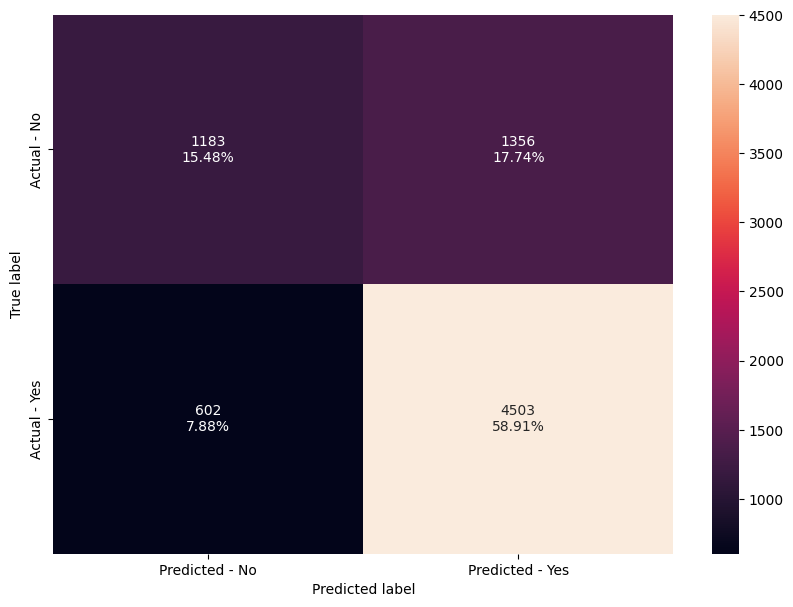

In [398]:
make_confusion_matrix(xgb_tuned, Y_test)

#### Feature importance

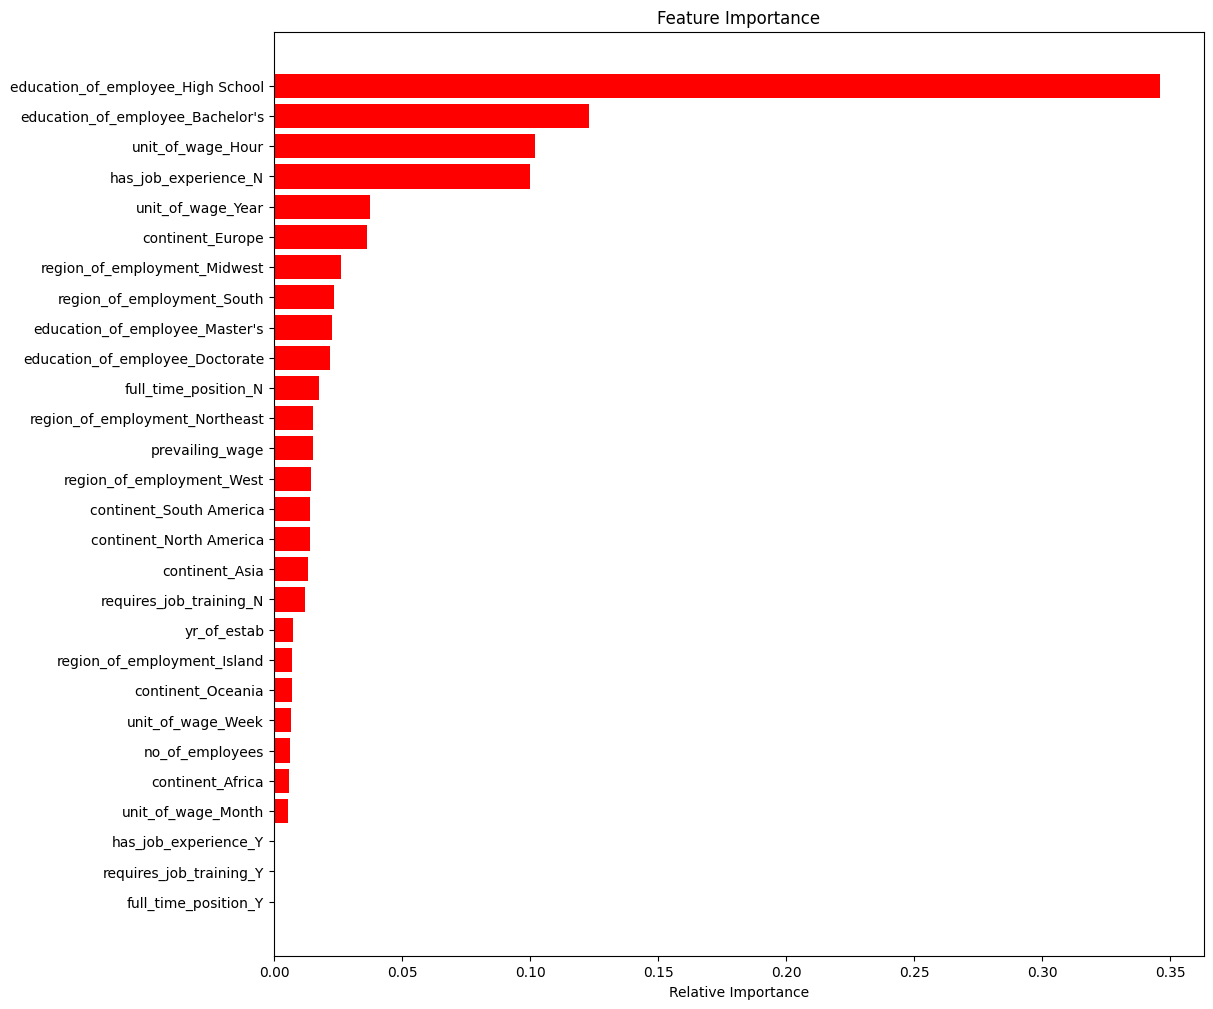

In [399]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Stacking Classifier

In [400]:
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train,Y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.05,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                Ra...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Training matrix and performance

In [401]:
stacking_classifier_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, Y_train)
print('Training performance \n', stacking_classifier_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.770464  0.884412    0.79499  0.83732


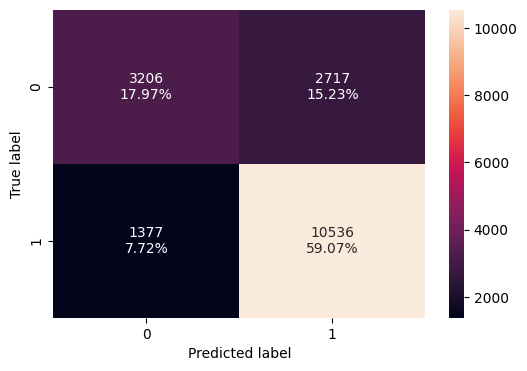

In [402]:
confusion_matrix_sklearn(stacking_classifier,X_train, Y_train)

#### Testing matrix and performance

In [403]:
stacking_classifier_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, Y_test)
print('Training performance \n', stacking_classifier_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.746468  0.872282   0.775919  0.821284


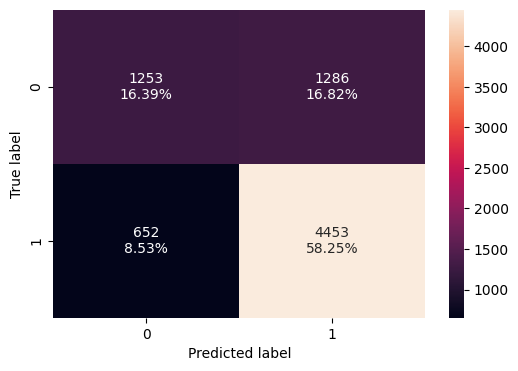

In [404]:
confusion_matrix_sklearn(stacking_classifier , X_test, Y_test)

## Model Performance Comparison and Conclusions

In [405]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_model_tuned_train_perf.T,
        bagging_classifier_train_perf.T,
        bagging_classifier_tuned_train_perf.T,
        rf_estimator_train_perf.T,
        rf_tuned_train_perf.T,
        abc_model_train_perf.T,
        abc_tuned_train_perf.T,
        gbc_model_train_perf.T,
        gbc_tuned_train_perf.T,
        xgb_model_train_perf.T,
        xgb_tuned_train_perf.T,
        stacking_classifier_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.724434,0.984301,0.998374,1.0,0.789303,0.738058,0.753869,0.757849,0.753756,0.840884,0.759475,0.770464
Recall,1.0,0.944850,0.985226,0.999916,1.0,0.901956,0.886259,0.887350,0.883657,0.885671,0.930664,0.892470,0.884412
Precision,1.0,0.725538,0.991217,0.997655,1.0,0.805774,0.760937,0.776195,0.782095,0.776894,0.846400,0.779415,0.794990
F1,1.0,0.820797,0.988213,0.998784,1.0,0.851157,0.818830,0.828059,0.829780,0.827724,0.886534,0.832120,0.837320


In [406]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_model_tuned_test_perf.T,
        bagging_classifier_test_perf.T,
        bagging_classifier_tuned_test_perf.T,
        rf_estimator_test_perf.T,
        rf_tuned_test_perf.T,
        abc_model_test_perf.T,
        abc_tuned_test_perf.T,
        gbc_model_test_perf.T,
        gbc_tuned_test_perf.T,
        xgb_model_test_perf.T,
        xgb_tuned_test_perf.T,
        stacking_classifier_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.658687,0.714024,0.690999,0.731816,0.719911,0.743328,0.734301,0.743851,0.745814,0.745029,0.726583,0.743851,0.746468
Recall,0.734770,0.941626,0.762194,0.867189,0.835651,0.871499,0.883252,0.881881,0.878355,0.881489,0.850735,0.881881,0.872282
Precision,0.749301,0.717999,0.772177,0.763407,0.766164,0.773067,0.758580,0.768653,0.772305,0.770021,0.765826,0.768653,0.775919
F1,0.741964,0.814746,0.767153,0.811996,0.799400,0.819337,0.816182,0.821383,0.821923,0.821993,0.806050,0.821383,0.821284


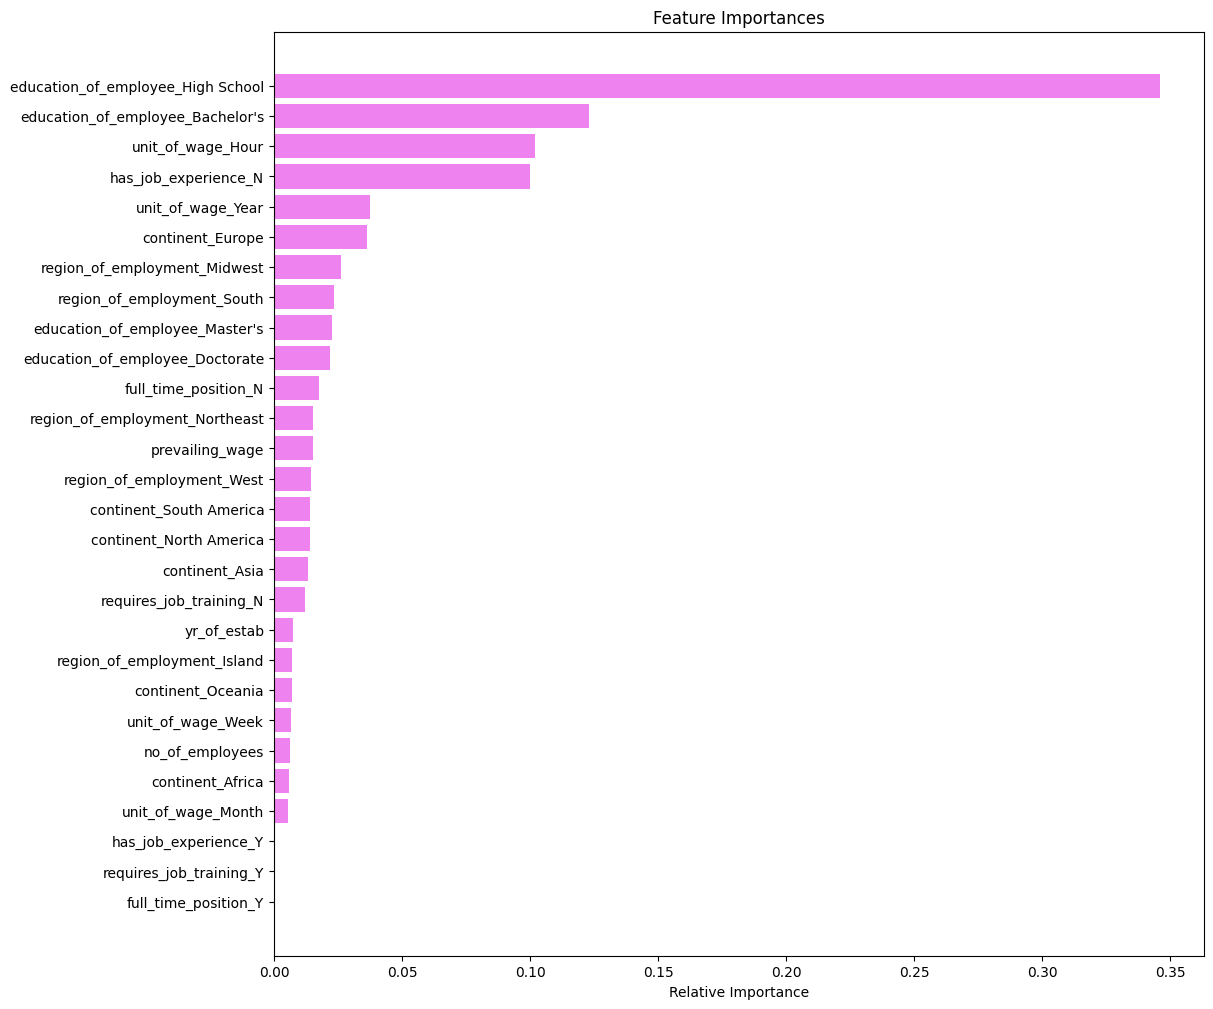

In [407]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

* Factors that drive visa denials - High school education, Bachelors, and hourly worker. 
* High school education: Applicants that only have high school education have a higher chance to be denied.
* Bachelor education: Applicants that have a Bachelor's degree had a higer chance to be denied.
* Unit of wage Hour: Hourly applicants had a higher chanc e to be denied.
* No job experience: Applicants with no job experience have a higher chacne to be denied.

* Using the model we can build a sutiable profile for applicants that influence the case status. Applicants that apply for salaried jobs, with higher educationa nd previous job experience are more likely to be certified.